### SA 2 - DSC1105
Ablian, Andrei Jon A.

Cuerdo, Naomi Hannah A.

Percia, Kyte Daiter M

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
from pandas.api.types import CategoricalDtype

#### Heart Disease Dataset

Heart disease is a leading cause of morbidity and mortality worldwide. Early detection of individuals at risk is critical for effective prevention and treatment. This analysis explores three clinical variables — **ST_Slope, ExerciseAngina, and RestingECG** — to assess their relationship with the presence of heart disease.  Using mosaic plots and cotabplots, we investigate how these variables relate to heart disease individually and in combination, and evaluate their potential predictive value.

Thus, this analysis aims to determine which predictor is more likely to be related with heart disease. 


In [5]:
df = pd.read_csv('C:\\Users\\naomi\\Downloads\\heart.csv')

df[['HeartDisease', 'ST_Slope', 'ExerciseAngina', 'RestingECG']].head()

,HeartDisease,ST_Slope,ExerciseAngina,RestingECG
0,0,Up,N,Normal
1,1,Flat,N,Normal
2,0,Up,N,ST
3,1,Flat,Y,Normal
4,0,Up,N,Normal


Having these variables, we will now check which variable is has a close relationship with heart disease.

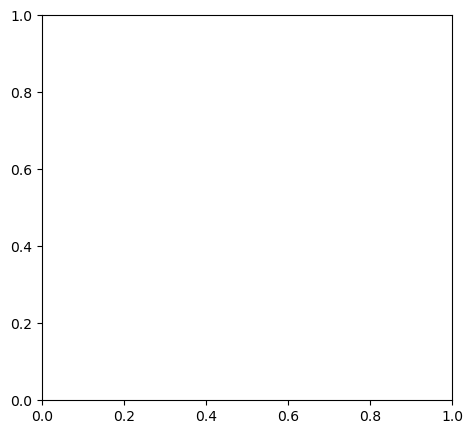

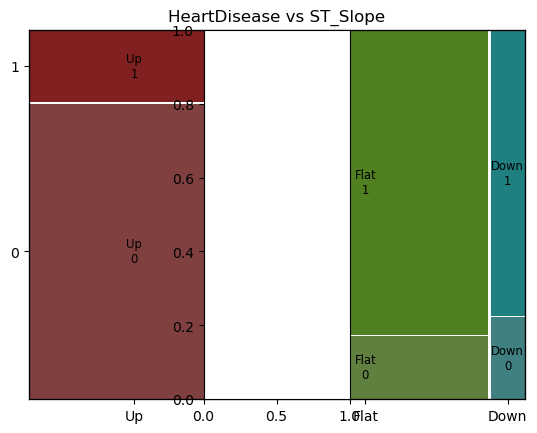

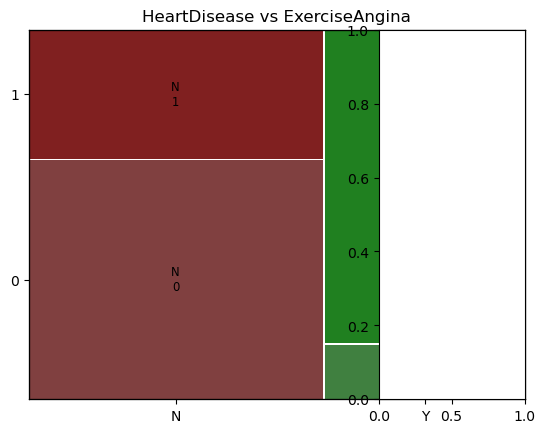

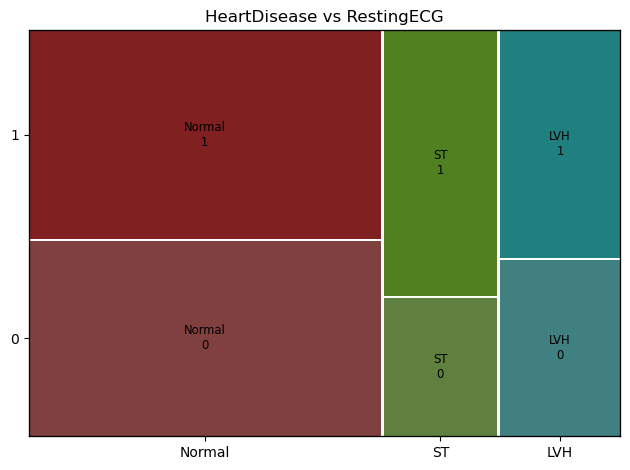

In [6]:

plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
mosaic(df, ['ST_Slope', 'HeartDisease'])
plt.title('HeartDisease vs ST_Slope')

plt.subplot(1, 3, 2)
mosaic(df, ['ExerciseAngina', 'HeartDisease'])
plt.title('HeartDisease vs ExerciseAngina')

plt.subplot(1, 3, 3)
mosaic(df, ['RestingECG', 'HeartDisease'])
plt.title('HeartDisease vs RestingECG')

plt.tight_layout()
plt.show()

From the Mosaic Plot, it shows that:

- There is a noticeable difference in HeartDisease rates depending on ST_Slope. The "Flat" slope seems to be associated with more heart disease cases,
  while "Up" is associated with fewer.
- There is a strong relationship — people with ExerciseAngina = "Y" are much more likely to have heart disease.
- RestingECG has a weaker association and may not be very useful on its own.

We then proceed to create mosaic plots to explore the relationships among the three predictors themselves to check for redundancy.

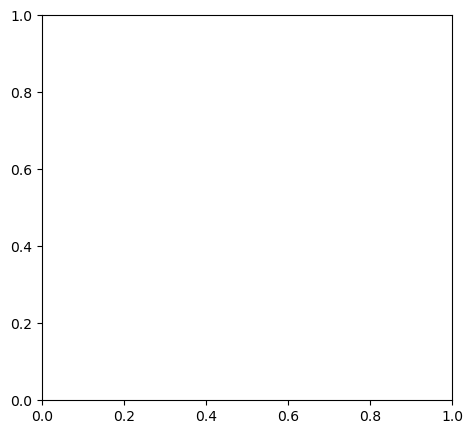

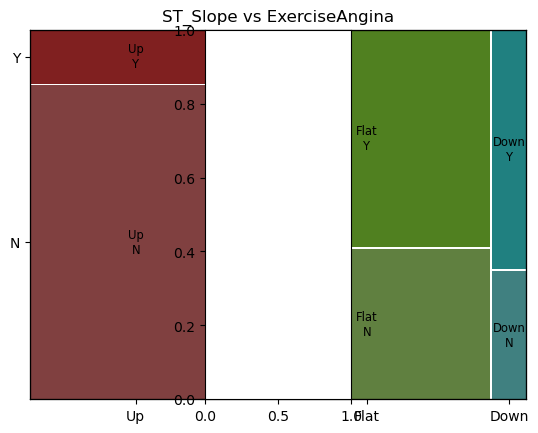

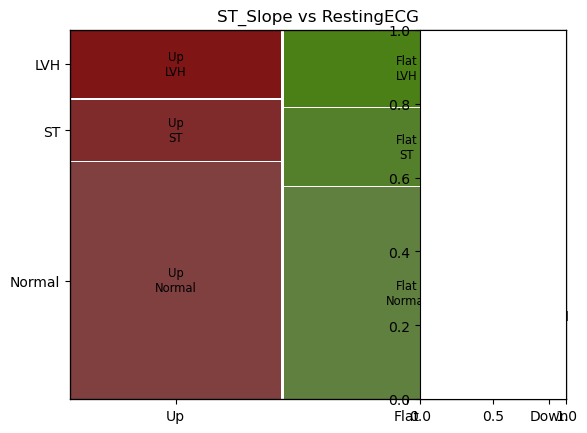

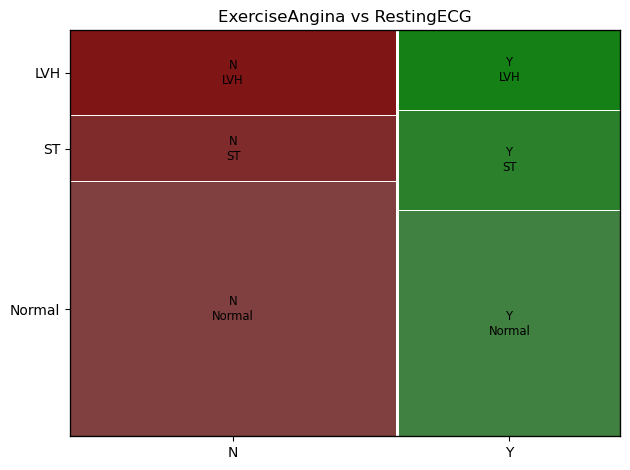

In [7]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
mosaic(df, ['ST_Slope', 'ExerciseAngina'])
plt.title('ST_Slope vs ExerciseAngina')

plt.subplot(1, 3, 2)
mosaic(df, ['ST_Slope', 'RestingECG'])
plt.title('ST_Slope vs RestingECG')

plt.subplot(1, 3, 3)
mosaic(df, ['ExerciseAngina', 'RestingECG'])
plt.title('ExerciseAngina vs RestingECG')

plt.tight_layout()
plt.show()

From the mosaic plot,  pairs of predictors show:
- ST_Slope and ExerciseAngina are moderately associated. Flat ST_Slope is more common among those with ExerciseAngina = Y.
- RestingECG appears mostly independent of the other two.

Lastly, we can now proceed with the interaction of **ST_Slope and ExerciseAngina on HeartDisease** 

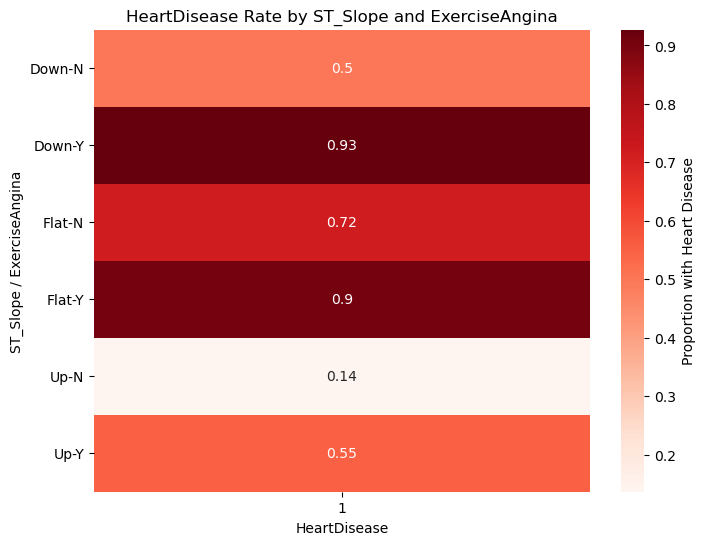

In [9]:
slope_order = ['Down', 'Flat', 'Up']
angina_order = ['N', 'Y']
df['ST_Slope'] = df['ST_Slope'].astype(CategoricalDtype(categories=slope_order, ordered=True))
df['ExerciseAngina'] = df['ExerciseAngina'].astype(CategoricalDtype(categories=angina_order, ordered=True))

cross_tab = pd.crosstab(index=[df['ST_Slope'], df['ExerciseAngina']], columns=df['HeartDisease'], normalize='index')

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab[[1]], annot=True, cmap='Reds', cbar_kws={'label': 'Proportion with Heart Disease'})
plt.title('HeartDisease Rate by ST_Slope and ExerciseAngina')
plt.ylabel('ST_Slope / ExerciseAngina')
plt.xlabel('HeartDisease')
plt.yticks(rotation=0)
plt.show()

From the heatmap, it can be seen that highest heart disease rates occur among individuals with both a flat ST_Slope and ExerciseAngina = Y. This implies a possible interaction effect — together, these variables provide more insight than individually.

#### Conclusion

- The most informative predictors are ST_Slope and ExerciseAngina = Y. RestingECG is less informative, ST_Slope and ExerciseAngina together help identify heart disease risk more effectively during interaction.